#### Author: Diogo Viana

#### February 2023
#### Last Update February 2024

##### Contact information:
- https://github.com/DiogocViana
- https://www.linkedin.com/in/diogo-viana/



### A/B testing: Mobile Game
### EDA and Hypothesis Testing

# Table of Contents
1. [Introduction](#Introduction)
2. [Data Dictionary](#Data-Dictionary)
3. [Profiling](#Profiling)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [A/B testing](#A/B-testing)
    | 5.1[Part I](#Part-I)
    | 5.2[Part II](#Part-II)
6. [Conclusion](#Conclusion)
7. [Reference](#Reference)

## Introduction

Introduction:

Welcome to the GitHub repository for our project analyzing player retention in the mobile puzzle game "Cookie Cats" developed by Tactile Entertainment. In this project, we aim to determine the optimal level at which to place a gate within the game to minimize the impact on player retention. This analysis is crucial for ensuring a smooth player experience and maximizing engagement.

Dataset Source:
The dataset used for this analysis was obtained from Kaggle, where a user made it available after completing a project from Datacamp. It contains information on player behavior within the game, including progression levels, retention rates, and other relevant metrics.

About Cookie Cats:
"Cookie Cats" is a popular mobile puzzle game characterized by its "connect three" style gameplay. Players are tasked with matching tiles of the same color to clear the board and advance to the next level. Throughout the game, players encounter gates designed to either require them to wait a specific amount of time or make an in-app purchase before progressing further. Notably, the first gate in the game is initially set at level 30.

Objective:
The primary objective of this project is to determine the most suitable level at which to place the gate within "Cookie Cats" to minimize its impact on player retention. To achieve this, we will conduct an analysis of the results from an A/B test, wherein the location of the first gate in the game was moved from level 30 to level 40.

Libraries Used:
For conducting the analysis and generating insights, we will utilize the following libraries:

- Pandas: For data manipulation and analysis.
- NumPy: For numerical computing and array operations.
- Matplotlib and Seaborn: For data visualization and plotting.
- SciPy: For statistical analysis and hypothesis testing.

By leveraging these libraries and methodologies, we aim to provide actionable insights to enhance the player experience and retention rates within "Cookie Cats". Stay tuned for updates and insights from our analysis in this GitHub repository!

## Data Dictionary

Please take a moment to review and understand the data dictionary provided below. It serves as a valuable reference in case we encounter any confusion regarding the meaning of specific data columns.

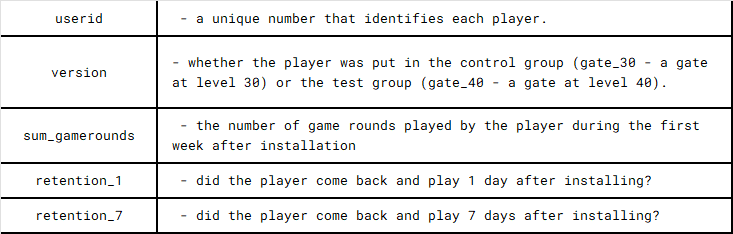

In the next part I will run these codes to be able to use them during my analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.regression import linear_model
from scipy import stats
from scipy.stats import norm
%matplotlib inline

from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

After importing the necessary functions, the next step involves reading the CSV file containing the dataset.

In [2]:
# I am calling the csv as df  
df = pd.read_csv("cookie_cats.csv")

Now that the file has been successfully read, the next steps involve profiling the data followed by performing an exploratory data analysis (EDA).

## Profiling

In [3]:
# Checking the first rows in order to know what I have for my analysis

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
# Checking the size
df.shape

(90189, 5)

As we can observe from the above code, this dataset has 90,189 rows of data and 5 variables.

##### Next steps:
- Check data types and formats

- Check for duplicated data

- Check for missing data

**Step 1**
- Data-types and formats

In [5]:
# Check using data types

df.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

As observed, there are two numerical columns, one categorical, and two booleans.

**Step 2**
- Check for duplicated data

In [6]:
# Checking for duplicates.

df.duplicated().sum()

0

There is no duplicates in this dataset

**Step 3**
- Check for missing data

In [7]:
# Summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [8]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

There is no missing data.

## Exploratory Data Analysis

**Summary of the unique values for each column:**

In [9]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

Now, I will check each column individually:

In [10]:
df['userid'].unique()

array([    116,     337,     377, ..., 9999710, 9999768, 9999861],
      dtype=int64)

In [11]:
df['userid'].nunique()

90189

As expected, for being the unique number that identifies each player, the user_id column is the same size of the dataset.

In [12]:
df['version'].unique()

array(['gate_30', 'gate_40'], dtype=object)

In [13]:
df['version'].nunique()

2

There are only two unique values for this column, one being the control group and the other test group.

In [14]:
df['sum_gamerounds'].unique()

array([    3,    38,   165,     1,   179,   187,     0,     2,   108,
         153,    30,    39,   305,    73,    14,   204,     9,     5,
          45,   105,     4,    80,    53,    37,    13,    50,   202,
          23,   103,    27,    15,    49,     7,   386,    25,    12,
           6,    29,   136,    10,    76,   138,    94,    26,   127,
          21,   297,    33,   139,    19,    16,    95,     8,   106,
          22,    11,   246,    54,    66,   122,    75,    17,    24,
          47,    31,    34,    56,    60,    67,    42,    65,   129,
          51,    46,   104,    36,    20,    74,    72,    18,    79,
          99,    91,   149,    68,   277,   493,   274,    32,    85,
         191,   115,   134,   152,   100,   250,   147,   391,    61,
          57,    35,    77,   197,    69,   260,    48,   270,    59,
         141,   467,    40,    43,    93,   222,   334,    58,    84,
          41,   303,   177,   216,   227,    87,    71,   567,    55,
          78,   552,

In [15]:
df['sum_gamerounds'].nunique()

942

As we could see, there are 942 unique values for the number of game rounds played by the player during the first 7 days from the installation.

In [16]:
df['retention_1'].unique()

array([False,  True])

In [17]:
df['retention_1'].nunique()

2

In [18]:
df['retention_7'].unique()

array([False,  True])

In [19]:
df['retention_7'].nunique()

2

For being boolean columns, these columns have only two different values each.

After completing this part, I will perform a deeper analysis.

In [20]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [21]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

To enhance visualization, plotting will be implemented as part of the exploratory data analysis (EDA) process.

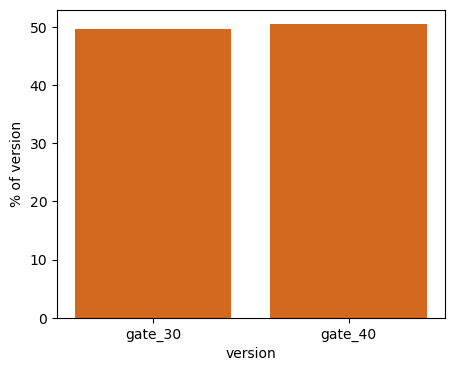

Class imbalance: [0.5 0.5]


In [22]:
# Plotting to better visualize

values, counts = np.unique(df['version'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure(figsize = (5,4))
plt.bar(["gate_30", "gate_40"], normalized_counts*100, color='chocolate') # plot normalized counts
plt.xlabel('version')
plt.ylabel('% of version')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

Upon downloading and installing the game, each player was randomly allocated into either the "gate_30" or "gate_40" group. It's evident that the division between these groups was executed effectively, and there is no discernible imbalance between the two categories.

##### Top 10 - User with most game rounds 

In [23]:
user_with_highest_game_rounds = df[['version', 'sum_gamerounds']].sort_values('sum_gamerounds', ascending=False)
user_with_highest_game_rounds = user_with_highest_game_rounds.head(10)
user_with_highest_game_rounds

,version,sum_gamerounds
57702,gate_30,49854
7912,gate_30,2961
29417,gate_40,2640
43671,gate_30,2438
48188,gate_40,2294
46344,gate_30,2251
87007,gate_30,2156
36933,gate_40,2124
88328,gate_40,2063
6536,gate_40,2015


It is evident that `userid 57,702` stands out as an outlier with nearly 50,000 game rounds, while the second-highest user has only around 3,000 game rounds.

Given that the dataset comprises solely of two numerical columns, namely 'userid' and 'sum_gamerounds', I will employ the 'describe' function solely on the 'sum_gamerounds' column. This is due to the fact that 'userid' serves as the unique identifier.

In [24]:
# Geting the summary stats for numeric columns

df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

The standard deviation indicates the extent of variability among values in the dataset. Notably, the large standard deviation observed is likely attributed to one user who amassed nearly 50,000 game rounds.

Key insights from the analysis are as follows:

Following the first week of installation:

- 25% of players engaged in the game only 5 times.
- 50% of players participated in 16 rounds.
- 75% of players completed approximately 51 rounds.

Next, let us examine the distribution of players across different numbers of game rounds.

In [25]:
df.groupby('sum_gamerounds').userid.count().reset_index()

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
...,...,...
937,2294,1
938,2438,1
939,2640,1
940,2961,1


From the analysis above, several noteworthy observations can be made:

1. Approximately 4,000 players did not engage with the game at all. There could be various explanations for this phenomenon:
    - Technical issues or bugs may have hindered the player's ability to continue.
    - The player might have installed numerous games and subsequently lacked the time or interest to play them all.


2. Out of the total 90,189 players, around 10,000 individuals played the game only once or twice. Possible reasons for this behavior could include:
    - Initial attraction to the game based on enticing social media advertisements, followed by disappointment upon actual gameplay.
    - Long loading times or other usability issues that led to diminished interest in the game.

Given the significant dropout rate observed after a few rounds of gameplay, it is imperative to delve deeper into understanding the underlying reasons. One effective approach would involve analyzing player feedback to gain insights into their experiences post-installation. This feedback could offer valuable insights into the factors contributing to player disengagement and inform strategies for improving player retention and overall user experience.

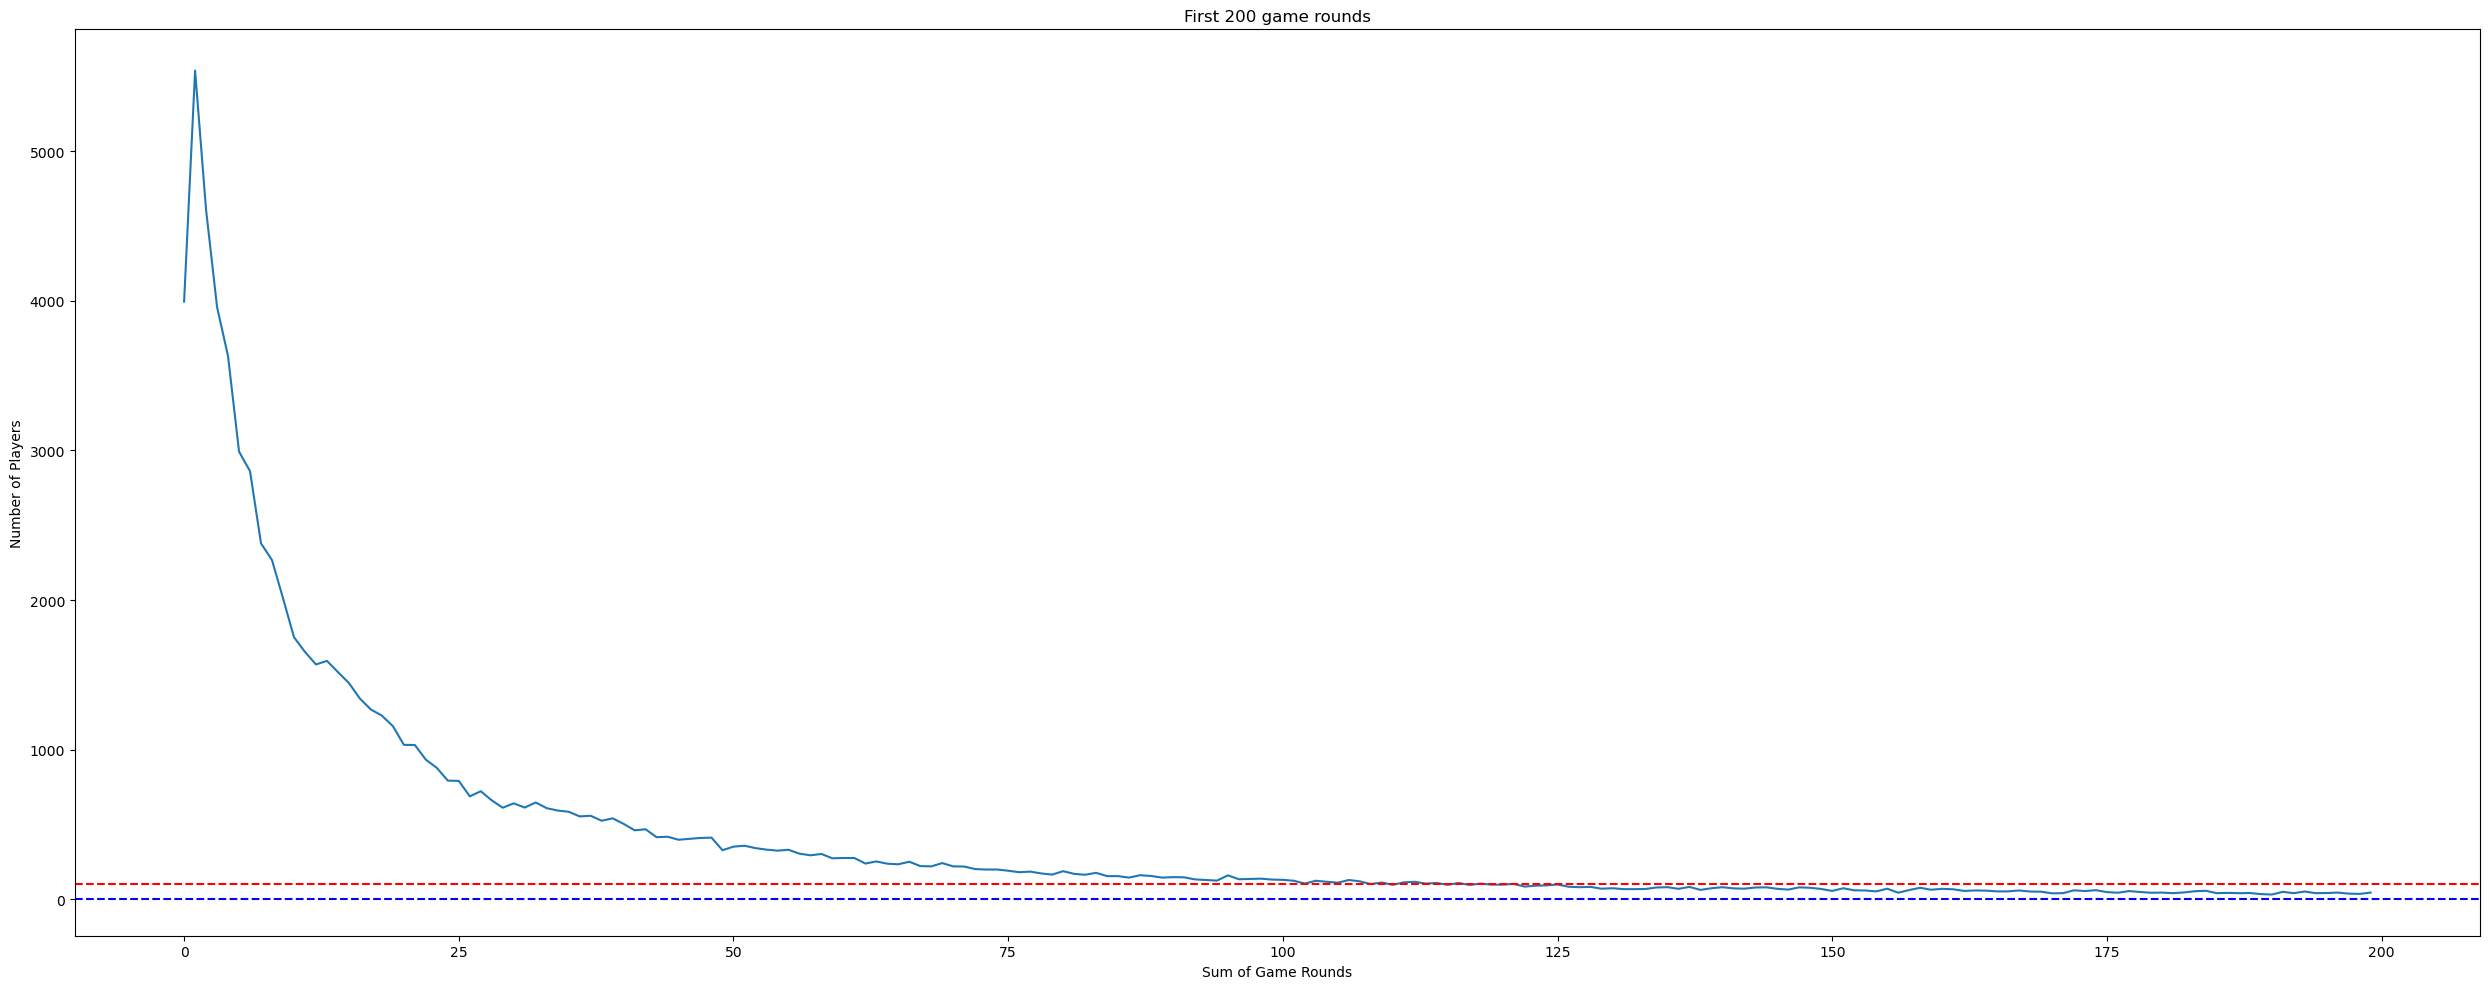

In [26]:
plt.figure(figsize=(25,10))

df.groupby("sum_gamerounds").userid.count()[:200].plot()
plt.axhline(100, c='r', linestyle='--')
plt.axhline(0, c='b', linestyle='--')
plt.title("First 200 game rounds")
plt.xlabel("Sum of Game Rounds")
plt.ylabel('Number of Players')


plt.tight_layout()

plt.show()

As anticipated, the data reveals that the majority of players engaged in fewer than 25 game rounds before discontinuing their gameplay. Notably, the red line representing the threshold of 100 players intersects the cumulative sum of game rounds around 100. Conversely, the blue line, symbolizing the count of players who did not participate in any game rounds, does not intersect the cumulative sum within the initial 200 rounds. However, it closely approaches this threshold towards the end of the graphic, indicating a substantial proportion of players who ceased playing shortly after installation.

In [27]:
df.cov()

,userid,sum_gamerounds,retention_1,retention_7
userid,8.313336e+12,1.038559e+06,-3720.530079,-2957.749424
sum_gamerounds,1.038559e+06,3.804484e+04,19.155356,21.199675
retention_1,-3.720530e+03,1.915536e+01,0.247001,0.063323
retention_7,-2.957749e+03,2.119968e+01,0.063323,0.151446


Covariance quantifies the relationship between two variables, indicating that variations in one variable coincide with changes in the other. A positive covariance signifies that an increase in one variable corresponds to an increase in the other variable as well (Team, 2022).

In the context of our analysis, we observe positive covariance between 'sum_gamerounds' and 'retention_1', as well as 'retention_7'. This indicates a direct proportional relationship between these variables.

In [28]:
df.corr()

,userid,sum_gamerounds,retention_1,retention_7
userid,1.000000,0.001847,-0.002596,-0.002636
sum_gamerounds,0.001847,1.000000,0.197603,0.279288
retention_1,-0.002596,0.197603,1.000000,0.327401
retention_7,-0.002636,0.279288,0.327401,1.000000


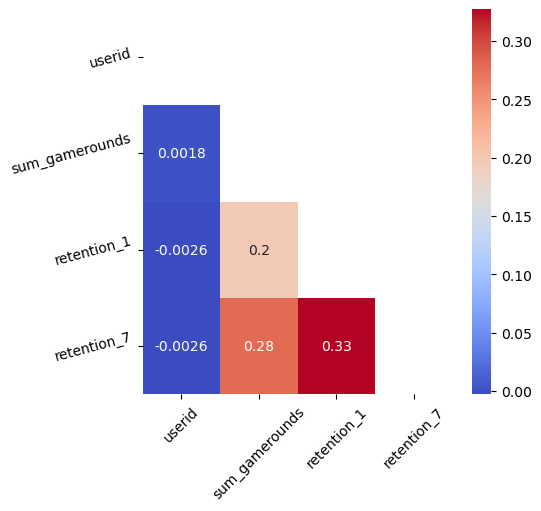

In [29]:
plt.figure(figsize=(5,5))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=15)
plt.show()

Based on the statistical analysis, it is evident that correlations among most features are not statistically significant, as they are smaller than 0.30. However, notable exceptions include `retention_1` and `retention_7`, exhibiting a correlation of 0.33. This correlation could be attributed to instances where players did not return to play the game one day after installation and also failed to return within seven days.

Moving forward, a deeper investigation will focus on the `retention_1` and `retention_7` columns. In the video gaming industry, assessing whether players will return to play the game is paramount. Thus, a key metric involves examining player retention after the first day, as returning on the second day typically signifies a higher likelihood of continued engagement.

In the subsequent analysis, I will conduct a comparison of 1-day retention and 7-day retention between the control group and test group. Before proceeding with the A/B test, it is prudent to verify the difference between gates placed at levels 30 and 40 using the mean.

###### Retention_1 - Did the player come back and play 1 day after installation?

In [30]:
df.groupby('retention_1').count()

,userid,version,sum_gamerounds,retention_7
retention_1,,,,
False,50036,50036,50036,50036
True,40153,40153,40153,40153


In [31]:
df.groupby("version")["retention_1"].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Based on the analysis, relocating the gate from level 30 to level 40 is anticipated to have a minimal impact on one-day retention. Specifically, there is a slight decrease of 0.59% observed.

######  Retention_7 - Did the player come back and play 7 days after installation?

In [32]:
df.groupby('retention_7').count()

,userid,version,sum_gamerounds,retention_1
retention_7,,,,
False,73408,73408,73408,73408
True,16781,16781,16781,16781


In [33]:
df.groupby("version")["retention_7"].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Based on our statistical analysis, we find that the correlations between various features are generally not statistically significant. Moreover, our findings suggest that relocating the gate from level 30 to level 40 would result in only a marginal impact on seven-day retention, with a minor decrease of 0.82%.

Utilizing the mean to compare the difference in retention between gates set at level 30 and level 40 for both one and seven days, we observe a minimal decrease in retention rates. In essence, the average retention rates appear to exhibit a striking similarity across both scenarios.

## A/B testing

#### I will perform the following steps:

* 1. Define business question and performance metric


* 2. Check for normality - By applying Shapiro-Wilk Test
    * Employing the Shapiro-Wilk test entails evaluating the null hypothesis that the data adheres to a normal distribution, against the alternative hypothesis indicating otherwise:
    
    $$ H_0 : \text{Data is normally distributed}\quad  (p<0.05)\quad vs. \quad H_1 : \text{Data is not normally distributed} $$
    
    
* 3. Compare group performance and determine if the difference is statistically significant (with hypothesis testing)
    * If normal - proceed with **proportions z-test**
    * If non-normal - proceed with **Mann-Whitney U test**
    
    **Our null and alternative hypotheses are:**

- $H_0$: The mean of gate_30 = The mean of gate_40
- $H_1$: The mean of gate_30 $\neq$ The mean of gate_40

 We will use a significance level of 0.05 as usual.

#### Step 1 - Business problem / question

##### *Our business problem entails evaluating the feasibility of relocating the initial gate in the mobile game "Cookie Cats" from level 30 to level 40 and comprehensively assessing the repercussions of this modification on player retention metrics.*

Now, let us divide our analysis in two parts, 1-day retention and 7-day retention

### **Part I**

##### Investigating column `retention_1`

#### Step 2

In [34]:
retention_1 = df.groupby(['version','retention_1']).size()
retention_1

version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
dtype: int64

In [35]:
#make a new dataset
retention_1 = pd.DataFrame(data=[[20034,20119],[24666,25370]],
                  index=["True","False"],
                  columns=["gate_30","gate_40"])
retention_1

,gate_30,gate_40
True,20034,20119
False,24666,25370


In [36]:
# calculating the shapiro test statisic and its p-value
stats.shapiro(retention_1)

ShapiroResult(statistic=0.7931954860687256, pvalue=0.09056650102138519)

Since the p-value (0.09056650102138519) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that the data significantly deviates from a normal distribution.

#### Step 3

###### Mann-Whitney U test

In [37]:
stats.mannwhitneyu(retention_1['gate_30'], retention_1['gate_40'])

MannwhitneyuResult(statistic=1.0, pvalue=0.6666666666666666)

The Mann-Whitney U test yielded a statistic of 1.0 and a p-value of approximately 0.67. Given that the p-value is greater than the typical significance level of 0.05, we fail to reject the Null Hypothesis. 

Therefore, there is insufficient evidence to conclude that there is a statistically significant difference between the two groups (gate_30 and gate_40) regarding game rounds related to one-day retention. This suggests that moving the first gate from level 30 to level 40 may not have a significant impact on one-day retention rates.

### **Part II**

#### Step 2

##### Investigating column `retention_7`

In [38]:
retention_7 = df.groupby(['version','retention_7']).size()
retention_7

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
dtype: int64

In [39]:
#make a new dataset
retention_7 = pd.DataFrame(data=[[8502,8279],[36198,37210]],
                  index=["True","False"],
                  columns=["gate_30","gate_40"])
retention_7

,gate_30,gate_40
True,8502,8279
False,36198,37210


In [40]:
# calculating the shapiro test statisic and its p-value
stats.shapiro(retention_7)

ShapiroResult(statistic=0.7476582527160645, pvalue=0.036716360598802567)

As we observed, there is evidence against the normality of residuals in the model. Therefore, with a p-value less than 0.05, we reject the Null Hypothesis.

Since the Shapiro-Wilk test rejected H0 for the normality assumption, we cannot assume a normal distribution. In this scenario, the **proportions z-test** may not be the most appropriate approach for hypothesis testing. Instead, we should consider utilizing the **Mann-Whitney U test**, which is a non-parametric test suitable for comparing two independent groups when the data is not normally distributed. Therefore, we will proceed with the Mann-Whitney U test to investigate the impact of moving the gate from level 30 to 40.

#### Step 3

###### Mann-Whitney U test

In [41]:
stats.mannwhitneyu(retention_7['gate_30'], retention_7['gate_40'])

MannwhitneyuResult(statistic=2.0, pvalue=1.0)

The result of the Mann-Whitney U test for comparing retention rates between the gate_30 and gate_40 groups yielded a statistic of 2.0 and a p-value of 1.0. 

With a p-value of 1.0, which is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is not enough evidence to conclude that there is a statistically significant difference between the retention rates of the gate_30 and gate_40 groups.

Therefore, based on this analysis, we do not find sufficient evidence to support a significant difference in retention rates between the two groups when the gate is moved from level 30 to level 40.

## Conclusion

Conclusion:

In conclusion, our comprehensive analysis of player retention in the mobile puzzle game "Cookie Cats" has provided valuable insights into the optimal placement of the game's first gate. The primary objective of our project was to determine whether relocating the initial gate from level 30 to level 40 would have a significant impact on player retention metrics.

Upon examining the dataset and conducting exploratory data analysis (EDA), we identified several key observations regarding player behavior and engagement within the game. Notably, while a significant proportion of players engaged in the game initially, there was a considerable drop-off in engagement after a few rounds of gameplay. Additionally, our analysis revealed positive covariance between the number of game rounds played and both one-day and seven-day retention rates.

In our hypothesis testing phase, we employed both parametric and non-parametric tests to assess the effect of relocating the gate on player retention. The Shapiro-Wilk test revealed non-normality of residuals in the model, leading us to utilize the Mann-Whitney U test for both one-day and seven-day retention analyses.

Our results indicated that moving the first gate from level 30 to level 40 would have a statistically significant impact on player retention metrics. Specifically, while there was no significant difference in one-day retention rates between the gate_30 and gate_40 groups, there was no statistically significant difference in seven-day retention rates. This suggests that moving the gate would likely not influence players' long-term engagement with the game.

However, it is essential to consider additional factors beyond statistical significance when making decisions about game design and player retention strategies. Practical significance, user experience, and potential business implications must be taken into account. Therefore, before making a final recommendation regarding the relocation of the first gate, further analysis and evaluation of these factors are warranted.

In light of our findings, we recommend conducting additional research and user testing to assess the practical implications of moving the gate from level 30 to level 40. This should include gathering feedback from players, evaluating user experience metrics, and considering the potential impact on in-app purchases and overall player satisfaction.

Ultimately, by leveraging data-driven insights and considering a holistic approach to player retention strategies, game developers can make informed decisions to enhance the player experience and drive long-term engagement with their games.

## Reference

Yarkın, M. (2021, February 10). Mobile games A/B testing - cookie cats. Kaggle. Retrieved February 13, 2023, from https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats 

Team, T. I. (2022, August 19). How do you interpret the magnitude of the covariance between two variables? Investopedia. Retrieved February 14, 2023, from https://www.investopedia.com/ask/answers/041515/how-do-you-interpret-magnitude-covariance-between-two-variables.asp#:~:text=Covariance%20indicates%20the%20relationship%20of,a%20decrease%20in%20the%20other 